### Scientific Python Quickstart
With the help of numpy, scipy, matplotlib and torch, Python becomes a powerful tool for scientific computing. Today, we're going to cover some of tools and tricks to using those libraries to write code for CS281.

This tutorial is adapted from the [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson, [Getting started with Python for R developers](http://n-s-f.github.io/2017/03/25/r-to-python.html) by 
Noam Finkelstein, [Linear regression example using Pytorch](https://gist.github.com/lbollar/f7bf60762817a6991038f4323c28f5aa) by Lyndon Ollar.

If you have experience using Matlab, you might find [numpy for Matlab](http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users) useful.

#### Installing Python + Numpy
For CS281 we're using Python 3, since it now has full support for most scientific packages we might use. In particular, we'll stick to using Python 3.5 or 3.6. You can check what version of Python you have preinstalled via  `python --version`

These days it's fairly straightforward to install scientific packages for Python. There are two options:
1. Install via [Anaconda](https://conda.io/docs/user-guide/install/download.html), a third-party package manager.
2. Install via `pip`, the builtin package manager (`pip` comes pre-installed in Python 3, thankfully):
```pip install --user numpy scipy matplotlib```

#### Python Basics

**Basic data types**

Numbers:

In [1]:
x = 3.5
print(type(x))
print(x + 1)
print(x ** 2)

# note that in Python 3 / means floating point division, and // means integer division:
print(5/2)
print(5//2)

<class 'float'>
4.5
12.25
2.5
2


Booleans:

In [26]:
t = True
f = False
print(type(t))
print(t and f)
print(t or f)
print(not t)

<class 'bool'>
False
True
False


Strings:

In [27]:
hello = 'hello'
print(len(hello))
print(hello[0])

5
h


##### Lists
The most basic python data structure is called a list. Much like in R, the Python list can be composed of elements of different types, and just represents an ordered collection:

In [28]:
xs = [3, 1, 2, 6, 7, 9, 8]
print(xs[-1])
xs[2] = 'foo'
print(xs)
xs.append('bar')
print(xs)
xs.pop()
print(xs)
print(xs[0:4])
print(xs[2:])
print(xs[:2])

8
[3, 1, 'foo', 6, 7, 9, 8]
[3, 1, 'foo', 6, 7, 9, 8, 'bar']
[3, 1, 'foo', 6, 7, 9, 8]
[3, 1, 'foo', 6]
['foo', 6, 7, 9, 8]
[3, 1]


In general be careful about lists in scientific Python code. If you're writing for loops over data elements, you're probably doing it wrong. Matrix multiplications are faster.

##### Dictionaries

In [29]:
d = {'cat': 'cute', 'dog': 'furry'}
print(d['cat'])
d['dog'] = 'cute'
print(d['dog'])

cute
cute


##### Loops

In [30]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


##### Functions

In [31]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


#### Numpy Basics
Numpy stores all data in a compact memory format in the form of `numpy.ndarray`s, which have two important properties: their datatype, and their shape:

In [32]:
import numpy as np
a = np.array([[2, 3, 4], [4, 5, 6]])
print(a.dtype)
print(a.shape)

int64
(2, 3)


You can cast an array to the right datatype, and reshape it to be the right shape:

In [33]:
b = a.astype(np.float32)
print(b.dtype)
c = a.reshape((6, 1))
print(c)

float32
[[2]
 [3]
 [4]
 [4]
 [5]
 [6]]


One useful trick is that you can reshape with a flexible shape of -1:

In [34]:
a.reshape((3, -1))

array([[2, 3],
       [4, 4],
       [5, 6]])


One of the most useful way to work with numpy arrays is via indexing and broadcasting, which is probably best taught through a few examples (and a [reference](https://scipy.github.io/old-wiki/pages/Cookbook/Indexing)):

In [35]:
a[:, 1] = 0.
print(a)
a[1, :] = 1.
print(a)
a[1, 1] = 2.
print(a)

[[2 0 4]
 [4 0 6]]
[[2 0 4]
 [1 1 1]]
[[2 0 4]
 [1 2 1]]


You can create numpy arrays in a lot of ways, but one way to initialize memory to use later is to use `numpy.zeros`, `numpy.ones`, and `numpy.eye`:

In [36]:
print(np.zeros((3, 2)))
print(np.ones(2))
print(np.eye(3))

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[ 1.  1.]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


One incredibly powerful technique is to use `np.bool` arrays to index into a numpy array:

In [37]:
print(a > 1)

[[ True False  True]
 [False  True False]]


In [38]:
a[a > 1] = 100
print(a)

[[100   0 100]
 [  1 100   1]]


The above works because `a > 1` is a boolean array of shape (2, 3), which matches the shape of `a`. Here's another example of viewing and indexing:

In [39]:
a = np.array([[2, 3, 4], [4, 5, 6]])
a.reshape((6, -1))[np.arange(6) % 2 == 1] = 10
print(a)

[[ 2 10  4]
 [10  5 10]]


In this case, we reviewed `a` as a (6, 1) array, and then indexed in with a boolean array (`np.arange(6) % 2 == 1`) of the same shape, and assigned those values 10. But wait, is that the right shape?

In [40]:
(np.arange(6) % 2 == 1).shape

(6,)

What happened here is that numpy *broadcasted* out the extra dimension for you, understanding what was going on. Here's another example of broadcasting:

In [41]:
a = np.array([[2, 3], [4, 4], [5, 6]])
a[np.arange(3) % 2 == 1] = 1.
print(a)

[[2 3]
 [1 1]
 [5 6]]


See the reference for more examples of broadcasting. Recently, PyTorch added support for the same kind of broadcasting.

One big gotcha is that arrays are often copied as views into the same underlying data rather than a copy, so be careful:

In [42]:
b = a
b[:2] = 0
print(b)
print(a)

[[0 0]
 [0 0]
 [5 6]]
[[0 0]
 [0 0]
 [5 6]]


#### Math
You can use your usual math operations like you'd expect, though there are few ways to do matrix multiplication:

In [43]:
a = np.random.random(size=(2, 3))
b = np.random.random(size=(2, 3))
a + b

array([[ 0.32699579,  0.21869483,  1.78761402],
       [ 1.61331749,  1.55460103,  0.3526336 ]])

Taking the transpose so you can multiply matrices is easy:

In [44]:
# equivalent ways of doing the same thing
np.dot(a, b.T)
a.dot(b.T)
a @ b.T

array([[ 0.80376065,  0.52927844],
       [ 0.23773416,  1.27525416]])

In [45]:
# note that this is element-wise multiplication, which is different:
a * b

array([[  3.08799840e-04,   1.12228437e-02,   7.92229004e-01],
       [  6.44007660e-01,   6.01353759e-01,   2.98927412e-02]])

There are many possible ways to sample from random distributions in `numpy` and `scipy`:

In [46]:
choices = np.random.choice(5, 3)
print(choices)
one_hot = np.zeros((3, 5))
one_hot[np.arange(3), choices] = 1.
print(one_hot)

[4 2 3]
[[ 0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]]


In [47]:
np.random.lognormal(size=(2, 2))

array([[ 0.32292028,  0.18601526],
       [ 3.93961012,  0.79492234]])

In [48]:
from scipy import stats
rv = stats.truncnorm(a=0.1, b=2.)
rv.pdf(0.4)

0.84191036206159553

In general, if there is a mathematical or statistical operation you want to perform, there is almost certainly a way to do it using `numpy` or `scipy`, using builtin operations which are fast. Ask a TF for help if you're ever stuck on this.

#### Matplotlib
While we can't cover everything in `matplotlib`, the default plotting library for scientific Python, we can go over some of the simple examples:

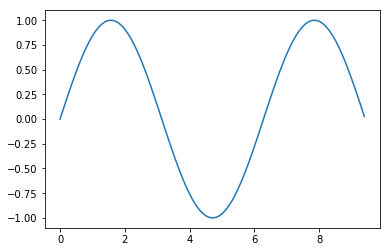

In [49]:
import matplotlib.pyplot as plt
# this line makes our plots inline for IPython
%matplotlib inline 

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

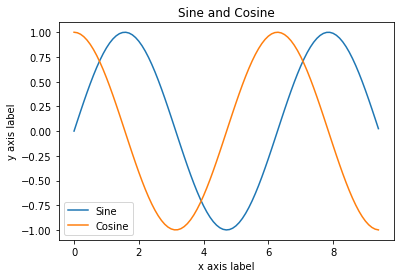

In [50]:
y_sin = y
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

One very useful tool is to use `imshow` to examine simple matrices or images to figure out what's going on:

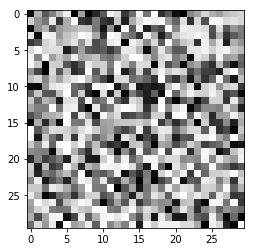

In [51]:
data = np.random.random((30, 30))
plt.imshow(data, cmap='Greys')

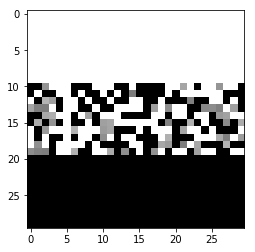

In [52]:
data[:10, :] = 0.
data[20:, :] = 1.
data[data > 0.6] = 1.
data[data < 0.4] = 0.
plt.imshow(data, cmap='Greys')

Of course, it's always very useful to plot distributions:

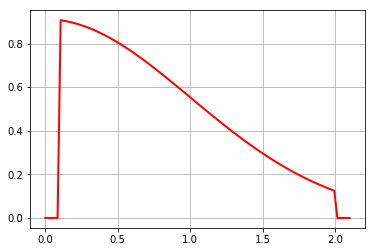

In [53]:
rv = stats.truncnorm(0.1, 2)
x = np.linspace(0.0, 2.1, 100)
plt.plot(x, rv.pdf(x), 'r-', label='truncnorm pdf', lw=2.)
plt.grid()

#### Reminders
These are some reminders (for both CS281 and future courses/projects):
- make sure you label your axes
- make sure you make axes tick labels big enough to read (i.e., use `plt.tick_params(labelsize=14)` etc.)
- try to include legends when it's necessary: 
```
plt.plot(data, label='method_a')
plt.legend()```
- export images in high resolution: `plt.savefig('export.png', dpi=300, bbox_inches='tight')`


#### PyTorch Basics
PyTorch features
* Tensor computation (like numpy) with strong GPU acceleration
* Deep Neural Networks built on a tape-based autograd system

In [4]:
import torch
from torch.autograd import Variable

##### Tensor Basics

In [5]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)
y = x + 2
print(y)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [6]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



##### Automatic Gradient Example

We begin with a 1-d linear regression toy example, where we generate data points by sampling from a line and adding noise.

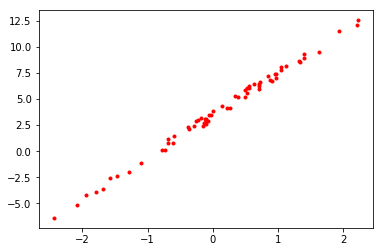

In [56]:
N = 64
a = 3
b = 4

x_data = np.random.randn(N)
noise = np.random.random(N)

y_data = a + b*x_data + noise

plt.plot(x_data,y_data, 'r.')
plt.show()

In order to work with PyTorch, we need to convert numpy arrays to PyTorch variables.

In [57]:
x = Variable(torch.Tensor(x_data), requires_grad=False)
y = Variable(torch.Tensor(y_data), requires_grad=False)

We specify a linear model with two parameters `w_alpha` and `w_beta`: ```y_pred = w_alpha + w_beta * x```. We initialize the parameters from the normal distribution.

In [58]:
w_alpha = Variable(torch.randn(1), requires_grad=True)
w_beta = Variable(torch.randn(1), requires_grad=True)

The initial model:

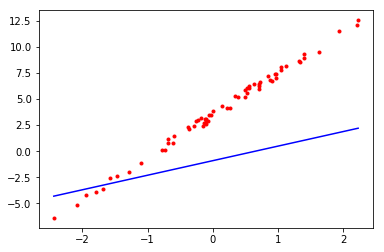

In [59]:
alpha = w_alpha.data.numpy()
beta = w_beta.data.numpy()
x_min = x_data.min()
x_max = x_data.max()
y_pred_min = alpha + beta*x_min
y_pred_max = alpha + beta*x_max
plt.plot(x_data,y_data, 'r.')
plt.plot([x_min,x_max], [y_pred_min,y_pred_max], 'b-')
plt.show()

Now we want to fit the model to the given data points. In order to do so, we minimize `(y_pred-y)^2` and use PyTorch's automatic differentiation to calculate the gradients.

In [60]:
optimizer = torch.optim.Adam([w_alpha, w_beta], lr=1e-2)

for t in range(1000):
    y_pred = x.mul(w_beta).add(w_alpha.expand(N))
    
    loss = (y_pred - y).pow(2).mean()
    
    if t % 20 == 0:
        print(t, loss.data[0])
    
    optimizer.zero_grad()   
    
    loss.backward()
    
    optimizer.step()

0 29.997730255126953
20 26.8530330657959
40 23.943042755126953
60 21.283260345458984
80 18.867292404174805
100 16.681692123413086
120 14.711578369140625
140 12.941932678222656
160 11.357913970947266
180 9.94497299194336
200 8.688944816589355
220 7.576113224029541
240 6.593324184417725
260 5.728039741516113
280 4.968411445617676
300 4.303337097167969
320 3.7224924564361572
340 3.2163610458374023
360 2.776240825653076
380 2.3942346572875977
400 2.0632290840148926
420 1.7768584489822388
440 1.5294625759124756
460 1.316035270690918
480 1.1321654319763184
500 0.9739835858345032
520 0.8381041884422302
540 0.7215685248374939
560 0.6217969655990601
580 0.5365411639213562
600 0.46384236216545105
620 0.4019923508167267
640 0.34950223565101624
660 0.3050742447376251
680 0.2675774097442627
700 0.23602712154388428
720 0.20956437289714813
740 0.18744361400604248
760 0.16901622712612152
780 0.153720885515213
800 0.1410728245973587
820 0.13065317273139954
840 0.12210293114185333
860 0.1151148229837417

Now we convert the fitted parameters back to numpy.

In [61]:
alpha = w_alpha.data.numpy()
beta = w_beta.data.numpy()
print("Optimized Alpha: {0}".format(alpha))
print("Optimized Beta: {0}".format(beta))

Optimized Alpha: [ 3.43258953]
Optimized Beta: [ 4.05835199]


The trained model would be something that looks like below. Since we do not fix random seeds, each run might return a slightly different result.

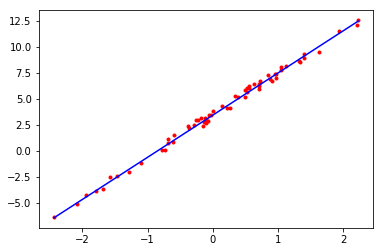

In [62]:
x_min = x_data.min()
x_max = x_data.max()
y_pred_min = alpha + beta*x_min
y_pred_max = alpha + beta*x_max

plt.plot(x_data,y_data, 'r.')
plt.plot([x_min,x_max], [y_pred_min,y_pred_max], 'b-')
plt.show()

More complicated loss functions are implemented inside PyTorch, inside `torch.nn` (e.g. `L1Loss, MSELoss, NLLLoss`, etc.). PyTorch can be thought of as a GPU-optimized version of Numpy, with autograd built in, as well as a whole host of useful transformations that might form the building blocks of 